In [1]:
import numpy as np
import pandas as pd


# 데이터 불러오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/test.csv')
train.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [ ]:
test.loc[test['사고유형']=='차대사람']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
7,ACCIDENT_39616,2022-01-01 13,토요일,맑음,대구광역시 서구 평리동,교차로 - 교차로횡단보도내,건조,차대사람
11,ACCIDENT_39620,2022-01-01 18,토요일,맑음,대구광역시 달서구 송현동,단일로 - 기타,건조,차대사람
13,ACCIDENT_39622,2022-01-01 19,토요일,맑음,대구광역시 달서구 진천동,단일로 - 기타,건조,차대사람
...,...,...,...,...,...,...,...,...
10941,ACCIDENT_50550,2022-12-31 02,토요일,맑음,대구광역시 북구 태전동,교차로 - 교차로횡단보도내,건조,차대사람
10944,ACCIDENT_50553,2022-12-31 07,토요일,맑음,대구광역시 북구 읍내동,단일로 - 기타,건조,차대사람
10949,ACCIDENT_50558,2022-12-31 12,토요일,맑음,대구광역시 동구 율하동,단일로 - 기타,건조,차대사람
10954,ACCIDENT_50563,2022-12-31 14,토요일,맑음,대구광역시 달서구 이곡동,단일로 - 기타,건조,차대사람


# 전처리

In [ ]:
train['도로형태_1'] = train['도로형태'].str.split(' - ', expand=True)[0]
train['도로형태_2'] = train['도로형태'].str.split(' - ', expand=True)[1]

test['도로형태_1'] = test['도로형태'].str.split(' - ', expand=True)[0]
test['도로형태_2'] = test['도로형태'].str.split(' - ', expand=True)[1]

In [ ]:
train[['시','구','동']] = train.시군구.str.split(' ',n=2,expand=True)
test[['시','구','동']] = test.시군구.str.split(' ',n=2,expand=True)

In [ ]:
train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,사망자수,중상자수,경상자수,부상자수,ECLO,도로형태_1,도로형태_2,시,구,동
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,0,1,0,0,5,단일로,기타,대구광역시,중구,대신동
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,0,0,1,0,3,단일로,기타,대구광역시,달서구,감삼동
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,0,0,1,0,3,단일로,기타,대구광역시,수성구,두산동
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,0,1,0,0,5,단일로,기타,대구광역시,북구,복현동
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,0,0,1,0,3,단일로,기타,대구광역시,동구,신암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,0,0,1,0,3,교차로,교차로안,대구광역시,수성구,수성동3가
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,0,0,1,0,3,단일로,기타,대구광역시,달서구,상인동
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,0,2,0,0,10,교차로,교차로안,대구광역시,달서구,월성동
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,0,0,1,0,3,기타,기타,대구광역시,달서구,장동


In [ ]:
train['사고일시'] = pd.to_datetime(train['사고일시'])
train["사고년"] = train["사고일시"].dt.year
train["사고월"] = train["사고일시"].dt.month
train['사고일'] = train['사고일시'].dt.day
train['사고시간'] = train["사고일시"].dt.hour


test['사고일시'] = pd.to_datetime(test['사고일시'])
test['사고년'] = test['사고일시'].dt.year
test['사고월'] = test['사고일시'].dt.month
test['사고일'] = test['사고일시'].dt.day
test['사고시간'] = test['사고일시'].dt.hour


In [ ]:
timeline = {5:'새벽',6:"새벽",7:"출퇴근",8:"출퇴근",18:"출퇴근",19:"출퇴근",20:"출퇴근",
            9:"주간",10:"주간",11:"주간",12:"주간",13:"주간",14:"주간",15:"주간",16:"주간",
            17:"주간",21:"심야",22:"심야",23:"심야",0:"심야",1:"심야",2:"심야",3:"심야",4:"심야"}

season = {3:"봄", 4:"봄",5:"봄",
          6:"여름",7:"여름",8:"여름",
          9:"가을",10:"가을",11:"가을",
          1:"겨울",2:"겨울",12:"겨울"}


In [ ]:
train['사고시간대'] = train['사고시간'].map(timeline)
train['계절'] = train["사고월"].map(season)
test['사고시간대'] = test['사고시간'].map(timeline)
test['계절'] = test["사고월"].map(season)

In [ ]:
train.drop(['사고일시','도로형태'],axis = 1, inplace =True)
test.drop(['사고일시','도로형태'],axis = 1, inplace =True)


In [ ]:
train = train.fillna("없음")

In [ ]:
import pandas as pd

def remove_outliers(df, column_name, threshold=1.5):
    """
    데이터프레임의 특정 열에서 IQR을 기반으로 이상치를 제거하는 함수.

    Parameters:
    - df: 데이터프레임
    - column_name: 이상치를 제거할 열의 이름
    - threshold: IQR을 계산할 때 사용할 상한값 (기본값은 1.5)

    Returns:
    - 이상치가 제거된 데이터프레임
    """
    # 특정 열의 값들을 추출
    column_values = df[column_name]

    # IQR 계산
    Q1 = column_values.quantile(0.25)
    Q3 = column_values.quantile(0.75)
    IQR = Q3 - Q1

    # 이상치의 상한과 하한 값 계산
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # 이상치 제거
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers


In [ ]:
train = remove_outliers(train, '경상자수')

# EDA

In [ ]:
train[['중상자수','사망자수','부상자수','경상자수','ECLO']].corr()

,중상자수,사망자수,부상자수,경상자수,ECLO
중상자수,1.000000,-0.012466,-0.120107,-0.491363,0.654049
사망자수,-0.012466,1.000000,-0.024806,-0.088502,0.310315
부상자수,-0.120107,-0.024806,1.000000,-0.250127,-0.181212
경상자수,-0.491363,-0.088502,-0.250127,1.000000,0.226588
ECLO,0.654049,0.310315,-0.181212,0.226588,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train['부상자수'].to_numpy().reshape(-1,1))
X_norm = scaler.transform(train['부상자수'].to_numpy().reshape(-1,1))

pd.DataFrame(X_norm)

,0
0,-0.331783
1,-0.331783
2,-0.331783
3,-0.331783
4,-0.331783
...,...
36752,-0.331783
36753,-0.331783
36754,-0.331783
36755,-0.331783


<Axes: >

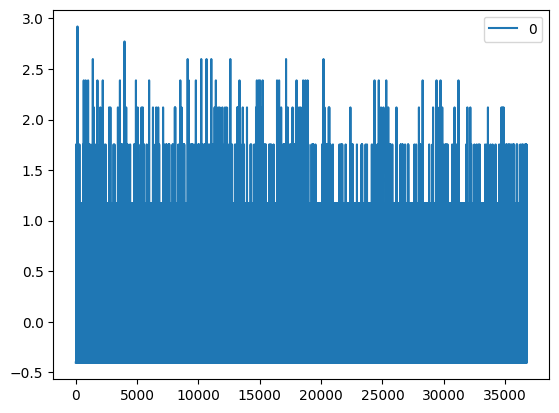

In [ ]:
np.log1p(pd.DataFrame(X_norm)).plot()

# 외부데이터 사용 여부 판단

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

cross_walk = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/A0043325.shp', encoding='cp949')#shx 데이터도 같이 있어야함
cross_walk.head()

,g2_id,uqftid_id,cnstc_se,cnstc_de,geometry
0,1,None,STS001,20211025,"POLYGON ((158986.226 363160.577, 158986.309 36..."
1,2,None,STS001,20211025,"POLYGON ((159014.971 363160.444, 159015.019 36..."
2,3,None,STS001,20211025,"POLYGON ((159811.373 363731.992, 159794.978 36..."
3,4,None,STS001,20211025,"POLYGON ((159811.601 363781.943, 159793.179 36..."
4,5,None,STS001,20211025,"POLYGON ((159812.463 363970.949, 159794.854 36..."


In [ ]:
from shapely.geometry import Polygon, MultiPolygon, Point
import matplotlib.pyplot as plt


cross_walk.to_crs(epsg = 4326, inplace = True)

In [ ]:
death_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/도로교통공단_사망교통사고정보(2019).csv',encoding = 'cp949')
death_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/도로교통공단_사망교통사고정보(2020).csv',encoding = 'cp949')
death_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/사망교통사고정보(2021).csv',encoding = 'cp949')


In [ ]:
death_2019_deagu=death_2019.loc[death_2019['발생지시도']=="대구"].reset_index()
death_2020_deagu=death_2020.loc[death_2020['발생지시도']=="대구"].reset_index()
death_2021_deagu=death_2021.loc[death_2021['발생지시도']=="대구"].reset_index()

In [ ]:
a=pd.concat([death_2019_deagu,death_2020_deagu])
death_train = pd.concat([a,death_2021_deagu]).reset_index()

In [ ]:
geometry = [Point(lon, lat) for lon, lat in zip(death_train['경도'], death_train['위도'])]
death_gdf = gpd.GeoDataFrame(death_train, geometry=geometry, crs='EPSG:4326')

In [ ]:
death_gdf

,level_0,index,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,...,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK),geometry
0,0,21,2019,2019-01-04 07,주,금,1,0,0,0,...,기타단일로,화물차,보행자,1090596.0,1762173.0,128.503308,35.851911,NaN,NaN,POINT (128.50331 35.85191)
1,1,29,2019,2019-01-05 08,주,토,1,1,0,1,...,기타,화물차,화물차,1103506.0,1772775.0,128.647635,35.946202,NaN,NaN,POINT (128.64764 35.94620)
2,2,33,2019,2019-01-06 12,주,일,1,0,0,0,...,교차로내,이륜차,특수차,1084705.0,1737537.0,128.435474,35.630341,NaN,NaN,POINT (128.43547 35.63034)
3,3,41,2019,2019-01-07 05,야,월,1,0,0,0,...,기타단일로,화물차,보행자,1102978.0,1764773.0,128.640746,35.874125,NaN,NaN,POINT (128.64075 35.87413)
4,4,80,2019,2019-01-12 05,야,토,2,4,4,0,...,교차로내,승용차,승합차,1087747.0,1744593.0,128.469834,35.693687,NaN,NaN,POINT (128.46983 35.69369)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,76,2644,2021,2021-12-10,주,금,1,0,0,0,...,기타단일로,화물차,보행자,NaN,NaN,128.537144,35.851389,1093652.0,1762147.0,POINT (128.53714 35.85139)
296,77,2664,2021,2021-12-12,야,일,1,0,0,0,...,교차로내,승용차,보행자,NaN,NaN,128.664862,35.881773,1105145.0,1765647.0,POINT (128.66486 35.88177)
297,78,2679,2021,2021-12-13,야,월,2,3,1,2,...,교차로부근,승용차,승용차,NaN,NaN,128.620878,35.854018,1101210.0,1762522.0,POINT (128.62088 35.85402)
298,79,2721,2021,2021-12-19,야,일,1,0,0,0,...,기타단일로,이륜차,없음,NaN,NaN,128.748063,35.872174,1112669.0,1764675.0,POINT (128.74806 35.87217)


In [ ]:
from shapely.geometry import Point
def check_contains(gdf1, gdf2):
    """
    gdf1의 각 지오메트리가 gdf2에 포함되는지 여부를 확인하는 함수

    Parameters:
    - gdf1: GeoDataFrame, 확인하려는 지오메트리를 포함하는 GeoDataFrame
    - gdf2: GeoDataFrame, 포함 여부를 확인하려는 GeoDataFrame

    Returns:
    - contains_series: pandas Series, gdf1의 각 행에 대해 gdf2에 포함되는지 여부를 나타내는 Series
    """
    contains_series = gdf1['geometry'].apply(lambda geom: any(geom.contains(other) for other in gdf2['geometry']))
    return contains_series


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54945 (\N{HANGUL SYLLABLE HOENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

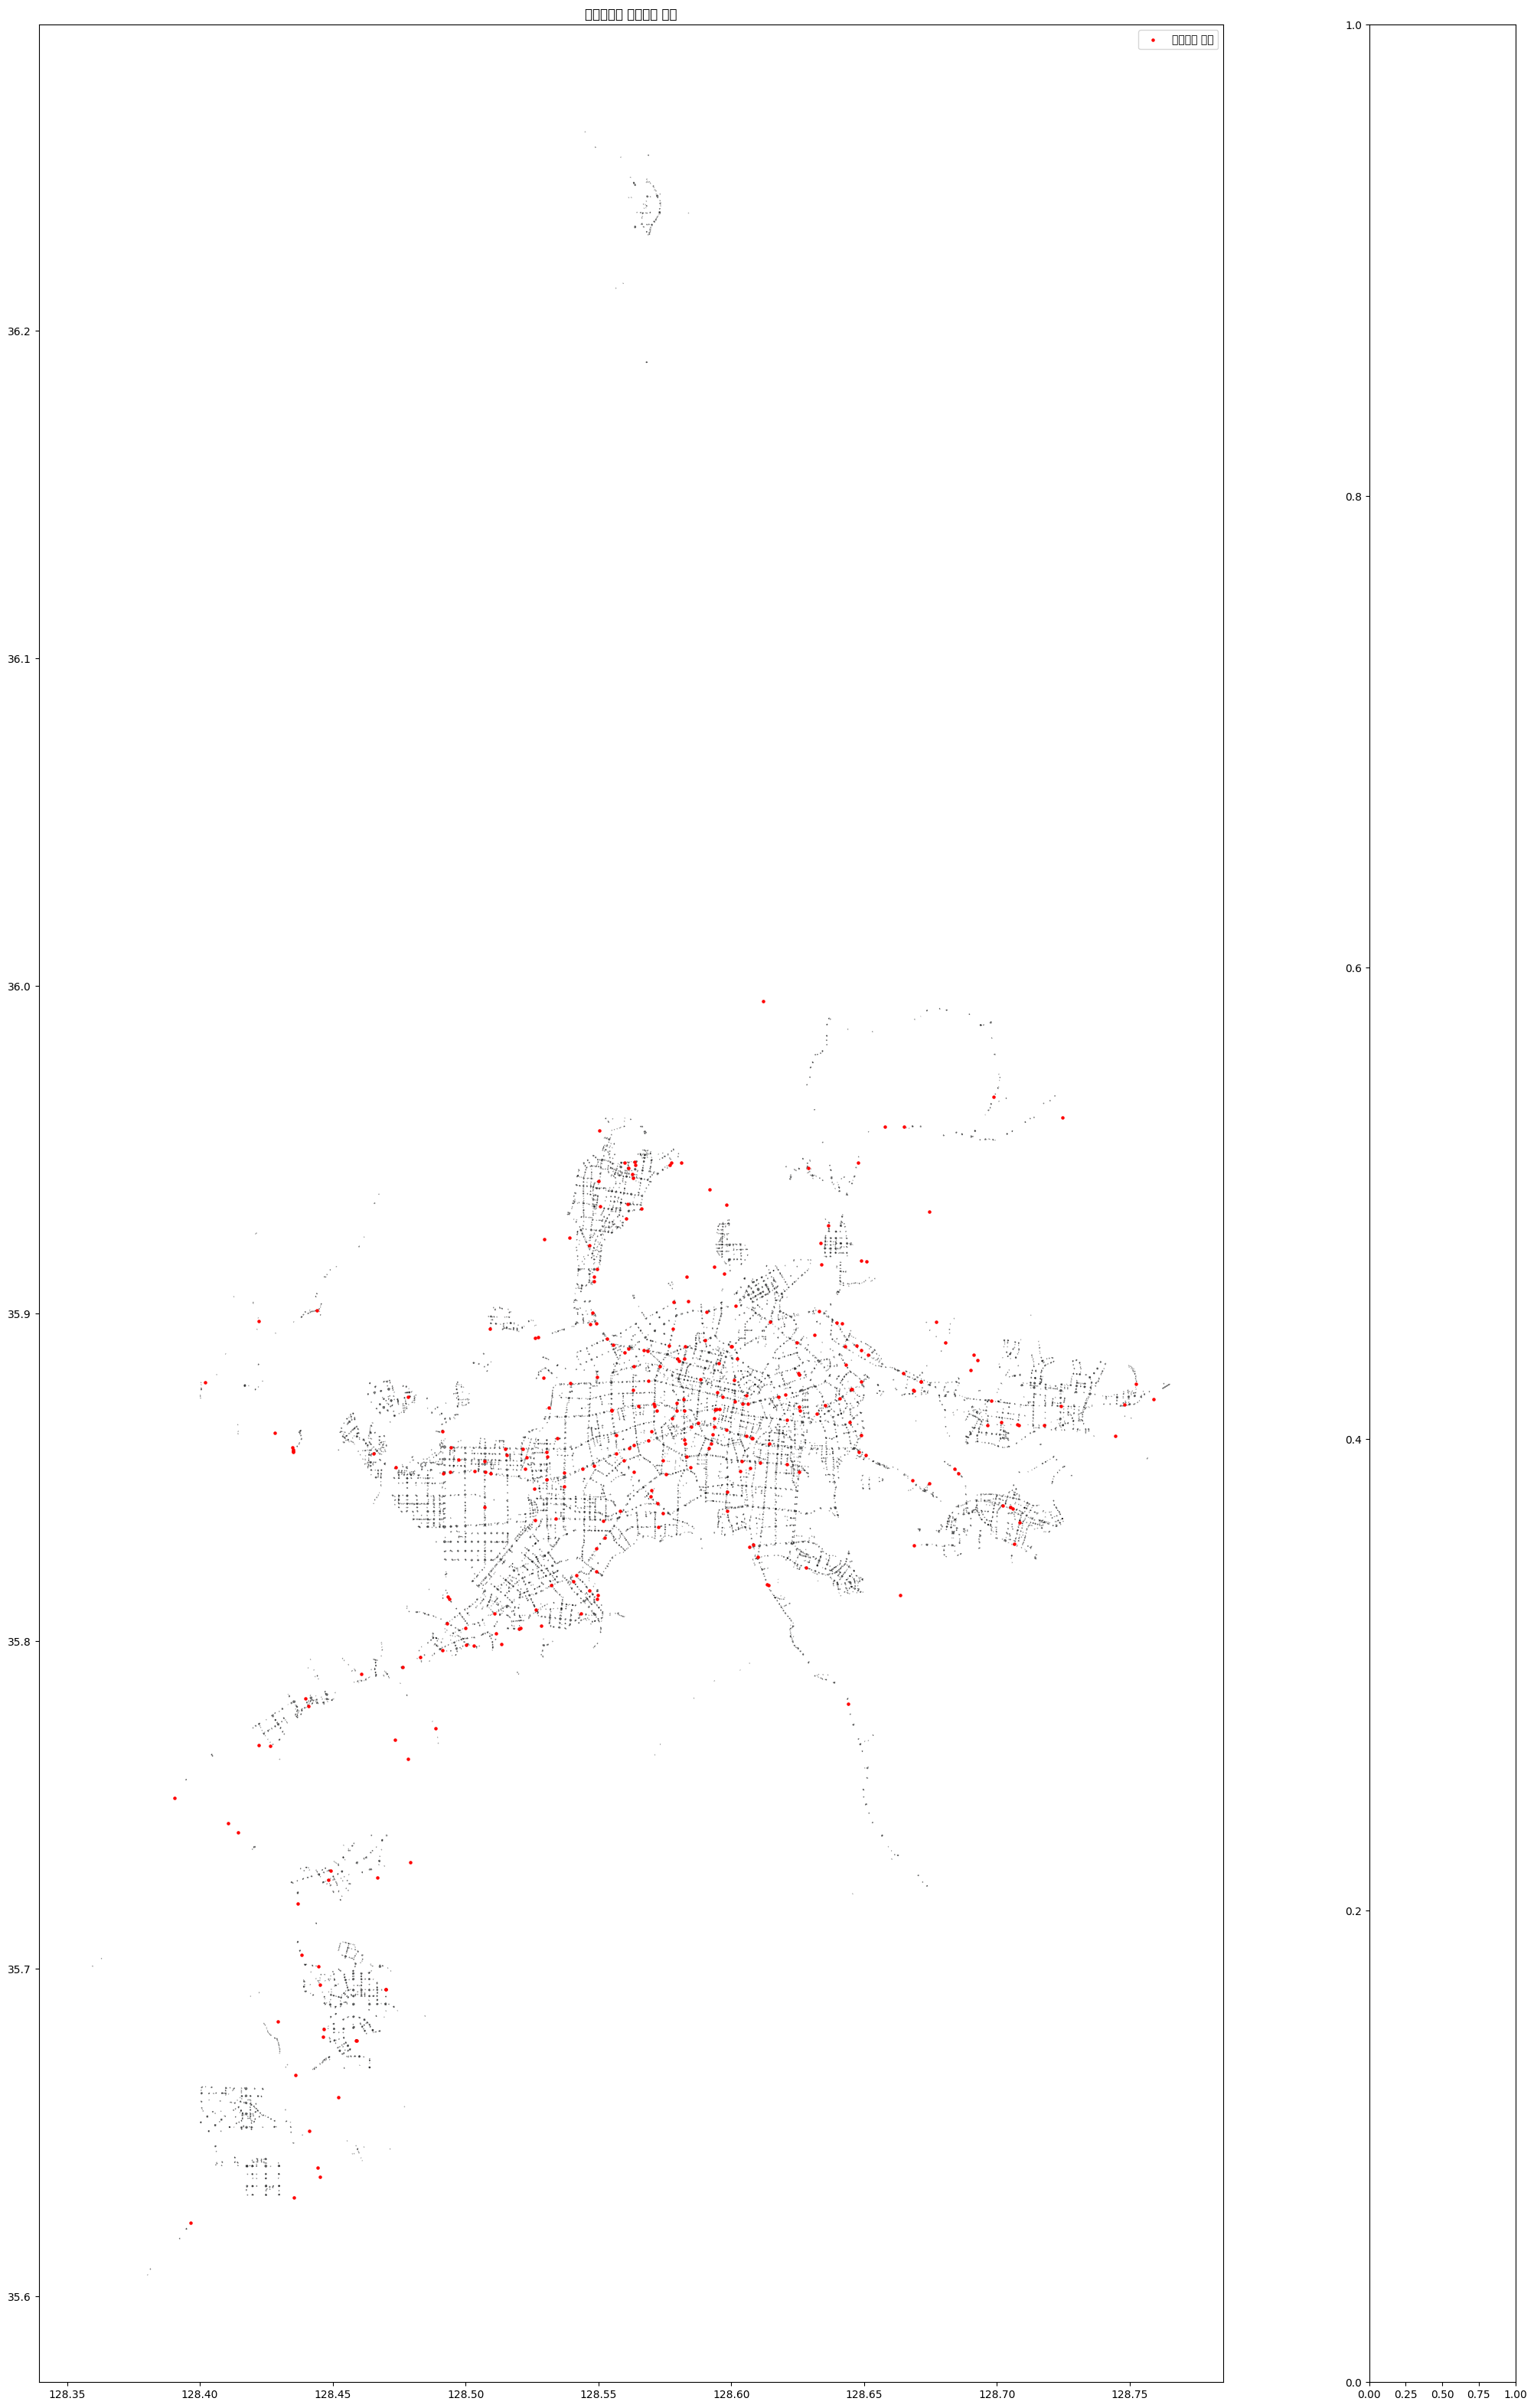

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(40, 40))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)

cross_walk.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
death_gdf.plot(ax=ax, color='red', markersize=5, label='사망사고 위치')
ax.set_title('횡단보도와 사망사고 위치')
ax.legend()

# 결과 출력
plt.show()

In [ ]:
F1 = '/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/DAEGU_CROSSROAD_GIS/대구광역시_가로망주정차현황_주차운영및이용실태정보(SHP)_20211210/대구시_주차운영및이용실태.shp'
D1 = gpd.read_file(F1, encoding='cp949')
D1.head()


,GIS_ID,MOCT_ID,G_RD_NAM,G_RD_BT,G_RD_LEN,G_GUCODE,G_GUNAM,RVDATE,S_PRK_TYPE,S_PRK_OP_Y,...,U_PRK_NT,U_PRK_N_L,U_PRK_N_IL,U_PRK_N_IN,U_PRK_N_OT,U_PRK_N_SD,U_PRK_N_ST,U_PRK_N_BT,U_PRK_DATE,geometry
0,1,None,방촌로,12.0,4.208,02,동구,2020-08,② 황색실선_단선,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"LINESTRING (168925.601 365574.266, 168926.484 ..."
1,2,None,동촌로,35.0,25.136,02,동구,2020-08,① 황색실선_복선,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"LINESTRING (169521.136 365079.639, 169541.425 ..."
2,3,None,입석로,12.0,240.835,02,동구,2020-08,⑤ 주차면,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"LINESTRING (168974.853 365622.076, 168929.316 ..."
3,4,None,동촌로,35.0,3.306,02,동구,2020-08,⑦ 횡단보도,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"LINESTRING (169552.936 365057.295, 169555.120 ..."
4,5,None,화랑로80길,14.0,5.594,02,동구,2020-08,⑦ 횡단보도,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"LINESTRING (169737.701 364264.717, 169733.591 ..."


In [ ]:
D1.describe()

,G_RD_BT,G_RD_LEN,C_CV_YN,C_SCH_ZONE,U_PRK_DY,U_PRK_D_L,U_PRK_D_IL,U_PRK_D_IN,U_PRK_D_OT,U_PRK_D_SD,U_PRK_D_ST,U_PRK_D_BT,U_PRK_NT,U_PRK_N_L,U_PRK_N_IL,U_PRK_N_IN,U_PRK_N_OT,U_PRK_N_SD,U_PRK_N_ST,U_PRK_N_BT
count,178857.000000,178857.000000,178857.000000,178857.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000,15620.000000
mean,14.908250,39.507291,0.082848,0.132178,1.897823,1.506786,0.390653,0.850384,1.047439,1.636428,0.237772,0.023624,1.888284,1.486108,0.402049,1.176056,0.712228,1.532843,0.305250,0.050192
std,10.946267,221.268624,0.275654,0.338685,4.151517,3.887366,1.610243,2.000182,2.770079,3.609981,0.765681,0.266618,3.713058,3.466393,1.422860,2.576543,1.612850,3.104701,0.842428,0.422542
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.953000,5.826000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,12.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,43.967000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
max,70.000000,71560.022000,1.000000,1.000000,87.000000,85.000000,36.000000,27.000000,62.000000,59.000000,19.000000,18.000000,72.000000,70.000000,24.000000,39.000000,45.000000,45.000000,25.000000,19.000000


In [ ]:

D1.to_crs(epsg = 4326, inplace = True)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54945 (\N{HANGUL SYLLABLE HOENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

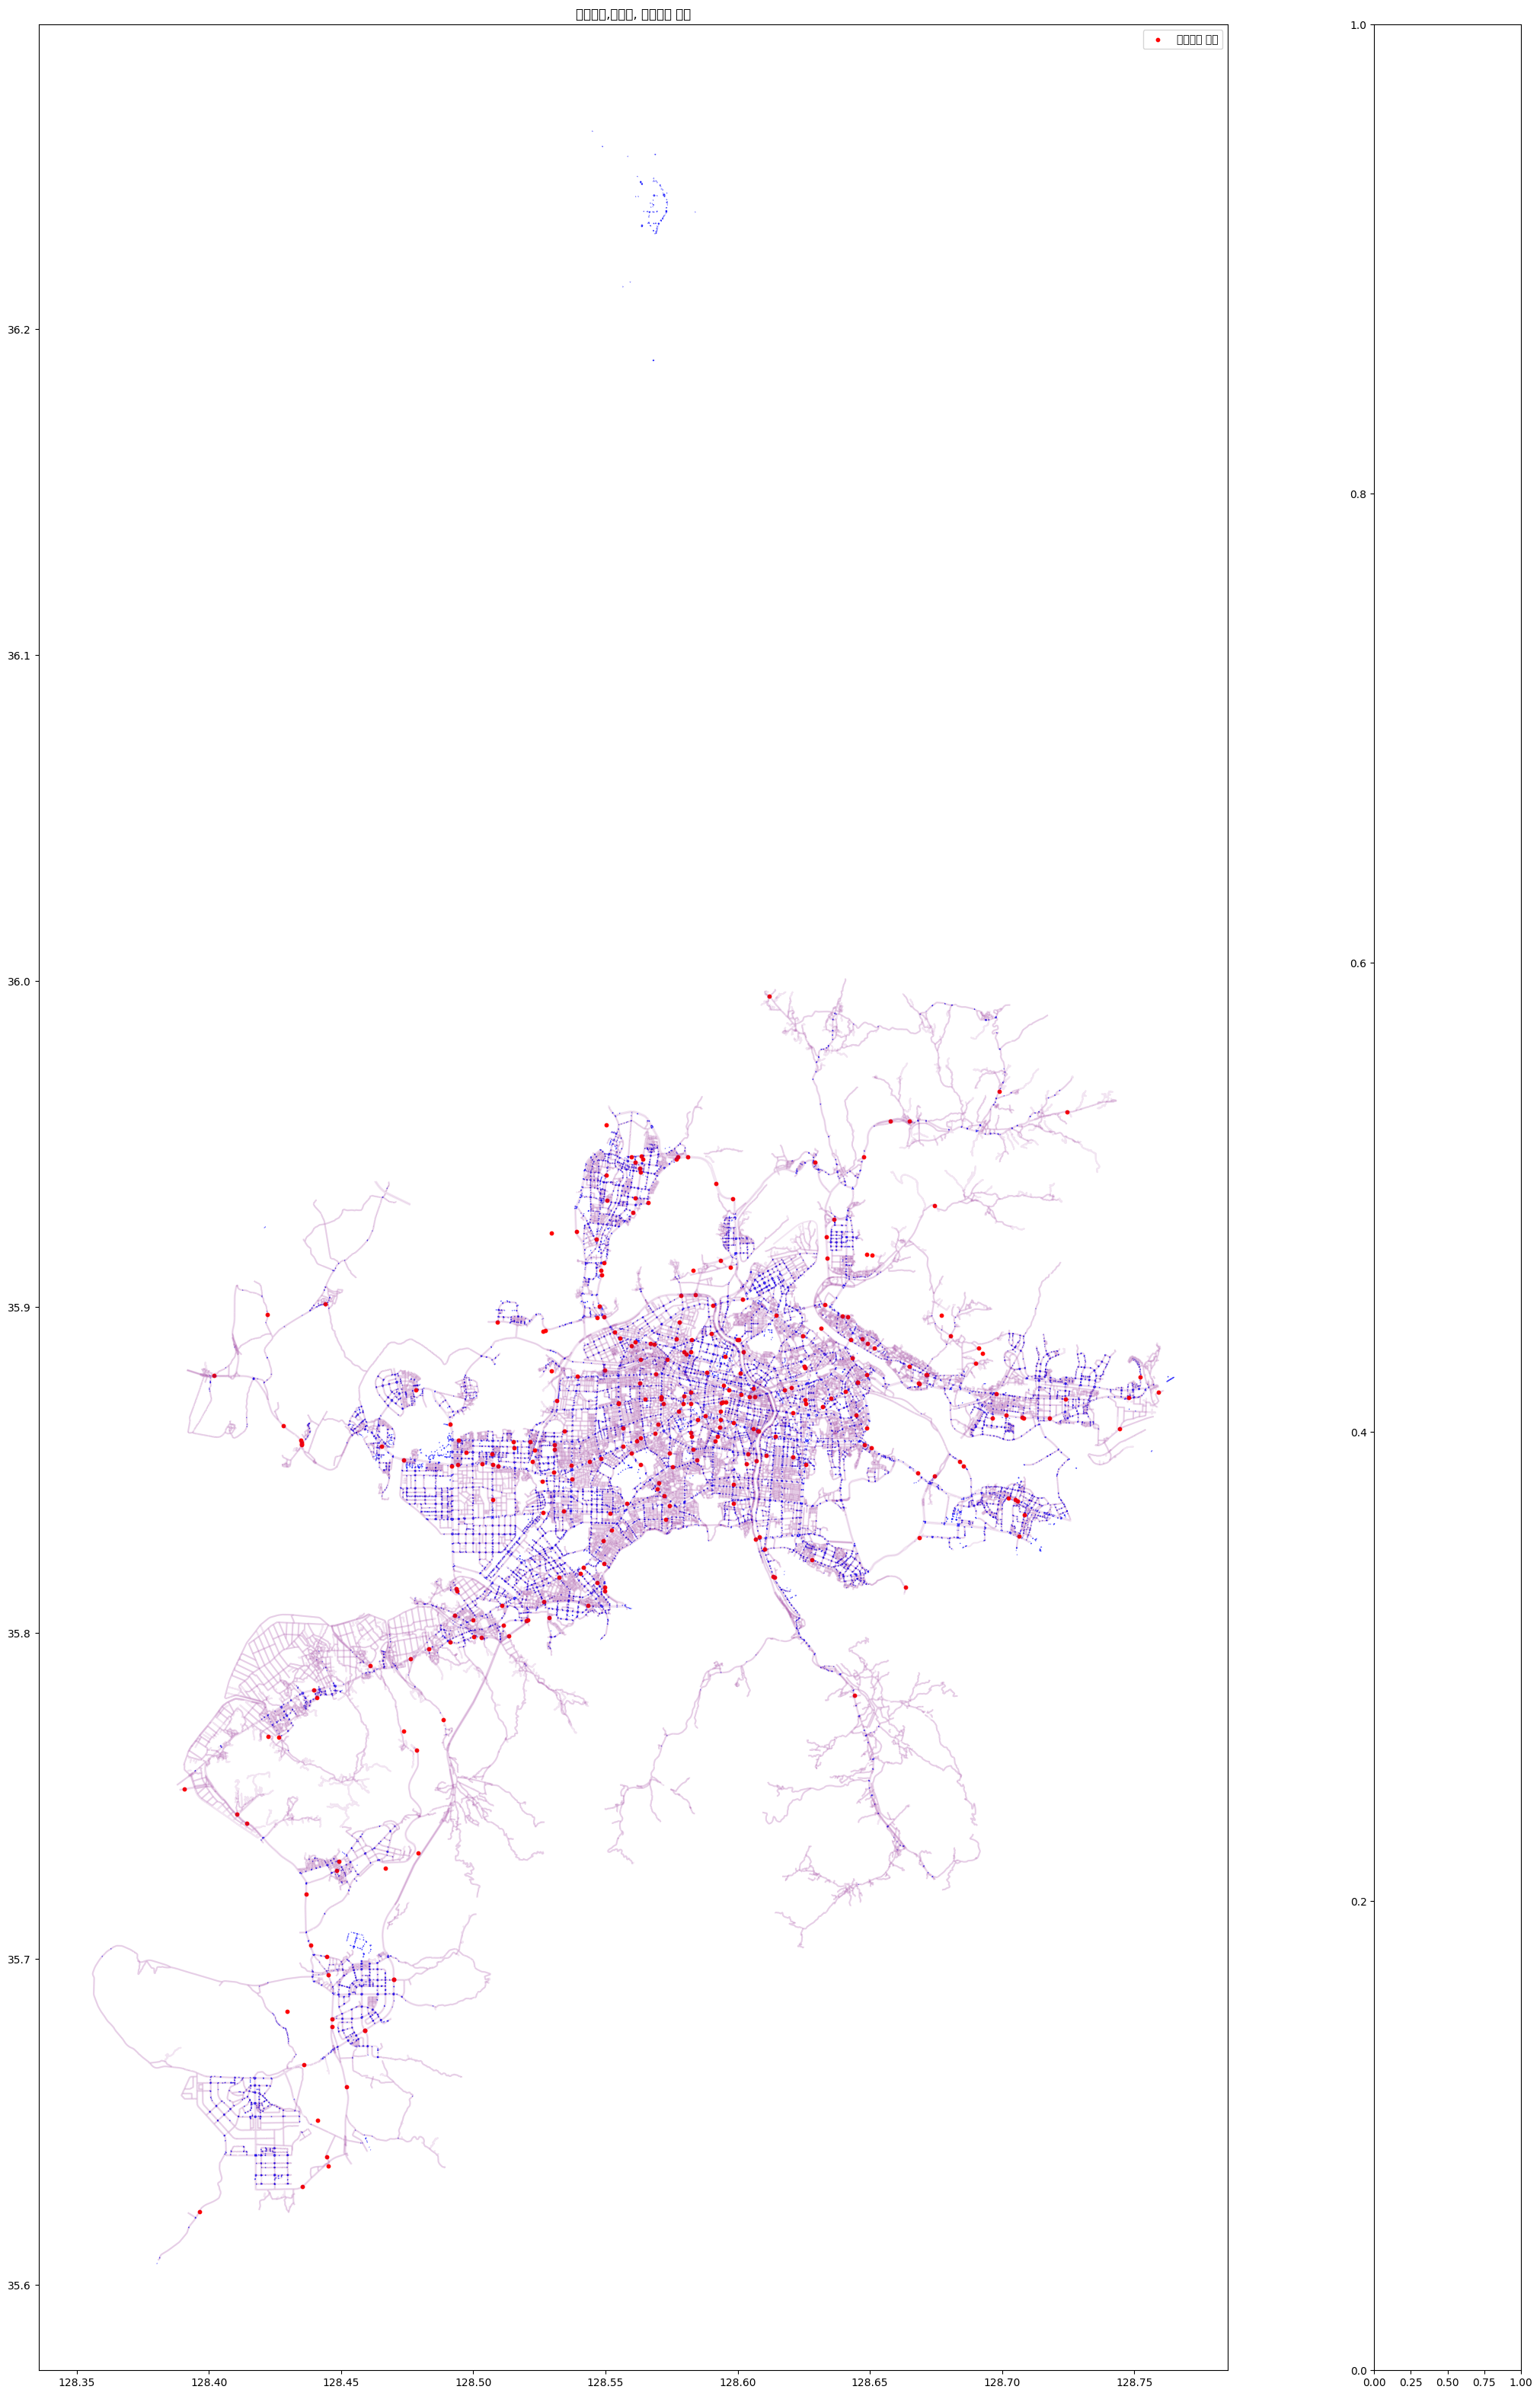

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(40, 40))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1)
cross_walk.plot(ax=ax, color='lightblue', edgecolor='blue', alpha=0.7)
D1.plot(ax=ax, color='purple', edgecolor='black', alpha=0.1)
death_gdf.plot(ax=ax, color='red', markersize=10, label='사망사고 위치')
ax.set_title('횡단보도,교차로, 사망사고 위치')
ax.legend()

# 결과 출력
plt.show()

먼저 도로에 사망사고가 난 노드들을 묶어준다 (클러스터링)- 사실 좌표는 클러스터링의 의미가 크게 없는것으로 알지만 일단 묶어준다 -> 사망사고 상습 발생구간 도출 -> 가능하다면 도로별로 매핑 하고싶지만, 상황이 안되면 구 혹은 동(군,가)등으로 매핑 -> 피처만들어줌

# 클러슽터링

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
points=death_gdf[['경도','위도']].values

In [ ]:
kmeans=KMeans(n_clusters=70).fit(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
death_gdf['cluster'] = kmeans.labels_
death_gdf


,level_0,index,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,...,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생위치X(UTMK),발생위치Y(UTMK),geometry,cluster
0,0,21,2019,2019-01-04 07,주,금,1,0,0,0,...,화물차,보행자,1090596.0,1762173.0,128.503308,35.851911,NaN,NaN,POINT (128.50331 35.85191),7
1,1,29,2019,2019-01-05 08,주,토,1,1,0,1,...,화물차,화물차,1103506.0,1772775.0,128.647635,35.946202,NaN,NaN,POINT (128.64764 35.94620),15
2,2,33,2019,2019-01-06 12,주,일,1,0,0,0,...,이륜차,특수차,1084705.0,1737537.0,128.435474,35.630341,NaN,NaN,POINT (128.43547 35.63034),9
3,3,41,2019,2019-01-07 05,야,월,1,0,0,0,...,화물차,보행자,1102978.0,1764773.0,128.640746,35.874125,NaN,NaN,POINT (128.64075 35.87413),10
4,4,80,2019,2019-01-12 05,야,토,2,4,4,0,...,승용차,승합차,1087747.0,1744593.0,128.469834,35.693687,NaN,NaN,POINT (128.46983 35.69369),60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,76,2644,2021,2021-12-10,주,금,1,0,0,0,...,화물차,보행자,NaN,NaN,128.537144,35.851389,1093652.0,1762147.0,POINT (128.53714 35.85139),8
296,77,2664,2021,2021-12-12,야,일,1,0,0,0,...,승용차,보행자,NaN,NaN,128.664862,35.881773,1105145.0,1765647.0,POINT (128.66486 35.88177),30
297,78,2679,2021,2021-12-13,야,월,2,3,1,2,...,승용차,승용차,NaN,NaN,128.620878,35.854018,1101210.0,1762522.0,POINT (128.62088 35.85402),18
298,79,2721,2021,2021-12-19,야,일,1,0,0,0,...,이륜차,없음,NaN,NaN,128.748063,35.872174,1112669.0,1764675.0,POINT (128.74806 35.87217),16


In [ ]:
death_gdf['cluster'].value_counts()

In [ ]:
import seaborn as sb
# 위의 데이터를 시각화처리( seaborn 사용) - 각 클러스터별 다른 색으로 , 100 사이즈로 출력
sb.lmplot( x='경도' , y='위도', data=death_gdf, fit_reg=False, scatter_kws={"s":10},hue="cluster" )
plt.title('k-mean')

In [ ]:
death_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   level_0      300 non-null    int64   
 1   index        300 non-null    int64   
 2   발생년          300 non-null    int64   
 3   발생년월일시       300 non-null    object  
 4   주야           300 non-null    object  
 5   요일           300 non-null    object  
 6   사망자수         300 non-null    int64   
 7   부상자수         300 non-null    int64   
 8   중상자수         300 non-null    int64   
 9   경상자수         300 non-null    int64   
 10  부상신고자수       300 non-null    int64   
 11  발생지시도        300 non-null    object  
 12  발생지시군구       300 non-null    object  
 13  사고유형_대분류     300 non-null    object  
 14  사고유형_중분류     300 non-null    object  
 15  사고유형         300 non-null    object  
 16  가해자법규위반      300 non-null    object  
 17  도로형태_대분류     300 non-null    object  
 18  도로형태         300 non-n

In [ ]:
death_gdf.loc[death_gdf['cluster']==1]['geometry']

47     POINT (128.46678 35.72797)
228    POINT (128.47905 35.73265)
Name: geometry, dtype: geometry

In [ ]:
death_gdf.loc[death_gdf['cluster']==12][['경도','위도']].values.tolist()

[[128.759047, 35.8740252],
 [128.7444272, 35.86280905],
 [128.7523853, 35.87866568],
 [128.7480629, 35.87217447]]

# 지도 시각화

In [ ]:
pip install folium

In [ ]:
import folium
m = folium.Map(location= [35.8714354,128.601445],
               zoom_start = 14)

In [ ]:
folium.Polygon(
    locations = death_gdf.loc[death_gdf['cluster']==1][['위도','경도']].values.tolist(),
    fill = True,
    tooltip = 'Polygon'
).add_to(m)


In [ ]:
for i in death_gdf.index:
    folium.Circle(
        location = death_gdf.loc[i, ['위도', '경도']],
        radius = 100
    ).add_to(m)

In [ ]:
m

# 밀도 기반 DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=5)

In [ ]:
pred=dbscan.fit_predict(death_gdf[['경도','위도']].values)

In [ ]:
death_gdf["cluster"] = pred

In [ ]:
death_gdf

,level_0,index,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,geometry,cluster
0,0,21,2019,2019-01-04 07,주,금,1,0,0,0,...,단일로,기타단일로,화물차,보행자,1090596.0,1762173.0,128.503308,35.851911,POINT (128.50331 35.85191),0
1,1,29,2019,2019-01-05 08,주,토,1,1,0,1,...,기타,기타,화물차,화물차,1103506.0,1772775.0,128.647635,35.946202,POINT (128.64764 35.94620),0
2,2,33,2019,2019-01-06 12,주,일,1,0,0,0,...,교차로,교차로내,이륜차,특수차,1084705.0,1737537.0,128.435474,35.630341,POINT (128.43547 35.63034),0
3,3,41,2019,2019-01-07 05,야,월,1,0,0,0,...,단일로,기타단일로,화물차,보행자,1102978.0,1764773.0,128.640746,35.874125,POINT (128.64075 35.87413),0
4,4,80,2019,2019-01-12 05,야,토,2,4,4,0,...,교차로,교차로내,승용차,승합차,1087747.0,1744593.0,128.469834,35.693687,POINT (128.46983 35.69369),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,62,2404,2022,2022-11-27 02:00,야,일,1,2,1,1,...,단일로,기타단일로,승용차,승용차,1090796.0,1762162.0,128.505521,35.851793,POINT (128.50552 35.85179),0
282,63,2420,2022,2022-11-29 00:00,야,화,1,0,0,0,...,단일로,기타단일로,승용차,없음,1099200.0,1770261.0,128.599586,35.923986,POINT (128.59959 35.92399),0
283,64,2426,2022,2022-11-30 06:00,주,수,1,0,0,0,...,교차로,교차로횡단보도내,승용차,보행자,1109573.0,1764431.0,128.713741,35.870326,POINT (128.71374 35.87033),0
284,65,2449,2022,2022-12-03 00:00,야,토,1,0,0,0,...,단일로,기타단일로,승용차,보행자,1090555.0,1762986.0,128.502946,35.859244,POINT (128.50295 35.85924),0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) miss

Text(0.5, 1.0, 'DBSCAN')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SY

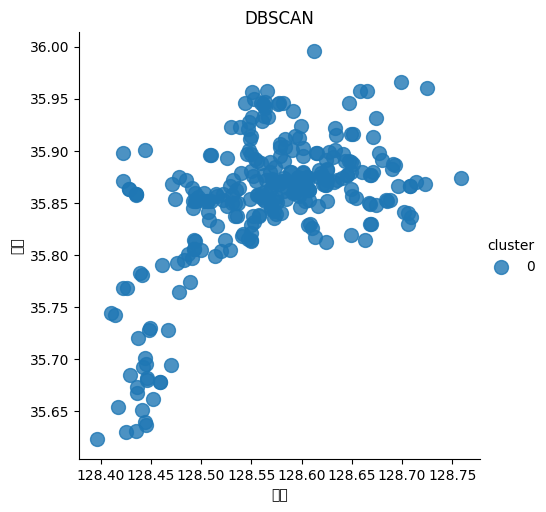

In [ ]:
import seaborn as sb
# 위의 데이터를 시각화처리( seaborn 사용) - 각 클러스터별 다른 색으로 , 100 사이즈로 출력
sb.lmplot( x='경도' , y='위도', data=death_gdf, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.title('DBSCAN')

# 인코딩

In [ ]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
test_x = test.drop(columns=['ID']).copy()
train_y = train['ECLO'].copy()
train_x = train[test_x.columns].copy()
train_death = train['사망자수'].copy()
train_deep = train['중상자수'].copy()
train_minor = np.log1p(train['경상자수']).copy()
train_injuries = train['부상자수'].copy()

test_x.shape,train_x.shape, train_death.shape, train_deep.shape, train_minor.shape, train_injuries.shape

((10963, 16), (36757, 16), (36757,), (36757,), (36757,), (36757,))

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36757 entries, 0 to 39608
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      36757 non-null  object
 1   기상상태    36757 non-null  object
 2   시군구     36757 non-null  object
 3   노면상태    36757 non-null  object
 4   사고유형    36757 non-null  object
 5   도로형태_1  36757 non-null  object
 6   도로형태_2  36757 non-null  object
 7   시       36757 non-null  object
 8   구       36757 non-null  object
 9   동       36757 non-null  object
 10  사고년     36757 non-null  int64 
 11  사고월     36757 non-null  int64 
 12  사고일     36757 non-null  int64 
 13  사고시간    36757 non-null  int64 
 14  사고시간대   36757 non-null  object
 15  계절      36757 non-null  object
dtypes: int64(4), object(12)
memory usage: 4.8+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

for i in categorical_features:
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])

display(train_x.head())
display(test_x.head())

['요일',
 '기상상태',
 '시군구',
 '노면상태',
 '사고유형',
 '도로형태_1',
 '도로형태_2',
 '시',
 '구',
 '동',
 '사고시간대',
 '계절']

,요일,기상상태,시군구,노면상태,사고유형,도로형태_1,도로형태_2,시,구,동,사고년,사고월,사고일,사고시간,사고시간대,계절
0,4.136799,4.165704,3.968006,4.167688,3.798680,4.100176,4.061165,4.179748,4.043311,3.968006,2019,1,1,0,4.442346,4.182931
1,4.136799,4.338192,4.121359,4.167688,3.798680,4.100176,4.061165,4.179748,4.117890,4.121359,2019,1,1,0,4.442346,4.182931
2,4.136799,4.165704,4.290844,4.167688,3.798680,4.100176,4.061165,4.179748,4.221172,4.290844,2019,1,1,1,4.442346,4.182931
3,4.136799,4.165704,3.723192,4.167688,4.279641,4.100176,4.061165,4.179748,4.145469,3.723192,2019,1,1,2,4.442346,4.182931
4,4.136799,4.165704,3.952818,4.167688,4.279641,4.100176,4.061165,4.179748,4.216714,3.952818,2019,1,1,4,4.442346,4.182931


,요일,기상상태,시군구,노면상태,사고유형,도로형태_1,도로형태_2,시,구,동,사고년,사고월,사고일,사고시간,사고시간대,계절
0,4.267478,4.165704,4.313916,4.167688,3.798680,4.329318,4.448872,4.179748,4.221172,4.313916,2022,1,1,1,4.442346,4.182931
1,4.267478,4.165704,4.255864,4.167688,3.798680,4.100176,4.061165,4.179748,4.221172,4.255864,2022,1,1,1,4.442346,4.182931
2,4.267478,4.165704,4.470586,4.167688,4.279641,4.329318,4.448872,4.179748,4.221172,4.470586,2022,1,1,4,4.442346,4.182931
3,4.267478,4.165704,4.059659,4.167688,4.279641,4.100176,4.061165,4.179748,4.221172,4.059659,2022,1,1,4,4.442346,4.182931
4,4.267478,4.165704,4.121359,4.167688,4.279641,4.329318,4.448872,4.179748,4.117890,4.121359,2022,1,1,6,4.538726,4.182931


# 딥러닝 모델?

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36757 entries, 0 to 39608
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요일      36757 non-null  float64
 1   기상상태    36757 non-null  float64
 2   시군구     36757 non-null  float64
 3   노면상태    36757 non-null  float64
 4   사고유형    36757 non-null  float64
 5   도로형태_1  36757 non-null  float64
 6   도로형태_2  36757 non-null  float64
 7   시       36757 non-null  float64
 8   구       36757 non-null  float64
 9   동       36757 non-null  float64
 10  사고년     36757 non-null  int64  
 11  사고월     36757 non-null  int64  
 12  사고일     36757 non-null  int64  
 13  사고시간    36757 non-null  int64  
 14  사고시간대   36757 non-null  float64
 15  계절      36757 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 4.8 MB


In [ ]:
import os
import random

pd.set_option('display.max_columns', None)

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [ ]:
torch.manual_seed(1)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_minor, test_size =0.2, random_state = 42)

In [ ]:
x_train_tensor = torch.Tensor(x_train.values)
x_test_tensor = torch.Tensor(x_test.values)
y_train_tensor = torch.Tensor(y_train.values)
y_test_tensor = torch.Tensor(y_test.values)

In [ ]:
x_train_tensor.size(1)

16

In [ ]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear1 = nn.Linear(input_size, output_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(output_size,1)

    def forward(self, x):
        self.x = self.linear1(x)
        self.x = self.relu(x)
        self.x = self.linear2(x)
        return x

In [ ]:
model = LinearRegressionModel(16, 16)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
def rmsle_loss(y_pred, y_true):
    """
    RMSLE (Root Mean Squared Logarithmic Error)를 계산하는 PyTorch 손실 함수
    """
    log_diff = torch.log1p(y_pred) - torch.log1p(y_true)
    squared_log_diff = log_diff**2
    mean_squared_log_diff = torch.mean(squared_log_diff)
    rmsle_value = torch.sqrt(mean_squared_log_diff)

    return rmsle_value

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = rmsle_loss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
down_val = float('inf')
num_epochs = 1000
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)

        # Backward 및 최적화
        optimizer.zero_grad()
        loss.requires_grad_(True)
        loss.backward()
        optimizer.step()

    # 100번마다 로그 출력
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# 테스트 데이터에 모델 적용
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)

        test_loss = criterion(outputs, labels)

print(f'Test Loss: {test_loss.item()}')

# 학습된 모델의 파라미터 출력
print('학습된 모델의 파라미터:')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data.numpy()}')
    if test_loss < down_val:
        down_val = test_loss
        torch.save(model.state_dict(), 'weights_only.pth')
        print('==Weight Update==\n')



RuntimeError: ignored

In [ ]:
test_x_tensor = torch.tensor(test_x.values, dtype = torch.float32)
predictions = []
# 모델에 입력 데이터 전달하여 예측값 얻기
model_new.eval()
with torch.no_grad():
    for inputs in test_x_tensor:  # Ensure the input has the correct shape for the model (1, 13)
        outputs = model_new(inputs)
        predictions.append(outputs.mean().item())  # Assuming single output per sample
# 예측값 출력
predictions


#데이콘 tf dense

In [ ]:
import tensorflow as tf

def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))

    return tf.sqrt(tf.reduce_mean(squared_error))

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

In [ ]:
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min',restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
]

In [ ]:
train_death

0        0
1        0
2        0
3        0
4        0
        ..
39604    0
39605    0
39606    0
39607    0
39608    0
Name: 사망자수, Length: 36757, dtype: int64

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/sample_submission.csv')


343/343 [==============================] - 1s 3ms/step


In [ ]:
def create_model():

    input_layer = tf.keras.Input(shape=(len(train_x.columns), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )

    return model

model = create_model()
history = model.fit(train_x.astype('float32'), train_y.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)
sample_submission["ECLO"] = model.predict(test_x.astype('float32'))

Epoch 1/100
1034/1034 [==============================] - 3s 2ms/step - loss: 0.4970 - metric_fn: 0.4970 - val_loss: 0.3817 - val_metric_fn: 0.3817 - lr: 0.0010
Epoch 2/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3934 - metric_fn: 0.3934 - val_loss: 0.3731 - val_metric_fn: 0.3731 - lr: 0.0010
Epoch 3/100
1034/1034 [==============================] - 2s 1ms/step - loss: 0.3875 - metric_fn: 0.3875 - val_loss: 0.3711 - val_metric_fn: 0.3711 - lr: 0.0010
Epoch 4/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3854 - metric_fn: 0.3854 - val_loss: 0.3663 - val_metric_fn: 0.3663 - lr: 0.0010
Epoch 5/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3842 - metric_fn: 0.3842 - val_loss: 0.3647 - val_metric_fn: 0.3646 - lr: 0.0010
Epoch 6/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3834 - metric_fn: 0.3834 - val_loss: 0.3646 - val_metric_fn: 0.3645 - lr: 0.0010
Epoch 7/100
1034/1034 [=================

In [ ]:
sample_submission = sample_submission[['ID','ECLO']]

In [ ]:
sample_submission.to_csv('sample_submission_3.csv')

In [ ]:
def create_model():

    input_layer = tf.keras.Input(shape=(len(train_x.columns), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )

    return model

model = create_model()
history = model.fit(train_x.astype('float32'), train_deep.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)
sample_submission["deep"] = model.predict(test_x.astype('float32'))

Epoch 1/100


1034/1034 [==============================] - 2s 2ms/step - loss: 0.3262 - metric_fn: 0.3262 - val_loss: 0.3042 - val_metric_fn: 0.3042 - lr: 0.0010
Epoch 2/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3181 - metric_fn: 0.3181 - val_loss: 0.3023 - val_metric_fn: 0.3023 - lr: 0.0010
Epoch 3/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3174 - metric_fn: 0.3173 - val_loss: 0.3024 - val_metric_fn: 0.3025 - lr: 0.0010
Epoch 4/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3171 - metric_fn: 0.3171 - val_loss: 0.3011 - val_metric_fn: 0.3011 - lr: 0.0010
Epoch 5/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3167 - metric_fn: 0.3167 - val_loss: 0.3015 - val_metric_fn: 0.3015 - lr: 0.0010
Epoch 6/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.3164 - metric_fn: 0.3164 - val_loss: 0.3007 - val_metric_fn: 0.3007 - lr: 0.0010
Epoch 7/100
1034/1034 [=============================

In [ ]:
def create_model():

    input_layer = tf.keras.Input(shape=(len(train_x.columns), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )

    return model

model = create_model()
history = model.fit(train_x.astype('float32'), train_minor.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)
sample_submission["minor"] = model.predict(test_x.astype('float32'))

Epoch 1/100
1034/1034 [==============================] - 3s 2ms/step - loss: 0.2811 - metric_fn: 0.2811 - val_loss: 0.2540 - val_metric_fn: 0.2540 - lr: 0.0010
Epoch 2/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2615 - metric_fn: 0.2615 - val_loss: 0.2509 - val_metric_fn: 0.2509 - lr: 0.0010
Epoch 3/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2599 - metric_fn: 0.2599 - val_loss: 0.2517 - val_metric_fn: 0.2517 - lr: 0.0010
Epoch 4/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2593 - metric_fn: 0.2593 - val_loss: 0.2508 - val_metric_fn: 0.2508 - lr: 0.0010
Epoch 5/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2593 - metric_fn: 0.2593 - val_loss: 0.2498 - val_metric_fn: 0.2498 - lr: 0.0010
Epoch 6/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2590 - metric_fn: 0.2590 - val_loss: 0.2508 - val_metric_fn: 0.2508 - lr: 0.0010
Epoch 7/100
1034/1034 [=================

In [ ]:
def create_model():

    input_layer = tf.keras.Input(shape=(len(train_x.columns), ))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=loss_fn,
                  metrics=[metric_fn]
                  )

    return model

model = create_model()
history = model.fit(train_x.astype('float32'), train_injuries.astype('float32'),
                    epochs=100,
                    callbacks=callbacks_list,
                    validation_split=0.1)

Epoch 1/100
1034/1034 [==============================] - 3s 2ms/step - loss: 0.2439 - metric_fn: 0.2439 - val_loss: 0.2187 - val_metric_fn: 0.2187 - lr: 0.0010
Epoch 2/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2360 - metric_fn: 0.2360 - val_loss: 0.2177 - val_metric_fn: 0.2177 - lr: 0.0010
Epoch 3/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2348 - metric_fn: 0.2348 - val_loss: 0.2188 - val_metric_fn: 0.2188 - lr: 0.0010
Epoch 4/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2344 - metric_fn: 0.2344 - val_loss: 0.2173 - val_metric_fn: 0.2173 - lr: 0.0010
Epoch 5/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2344 - metric_fn: 0.2343 - val_loss: 0.2174 - val_metric_fn: 0.2174 - lr: 0.0010
Epoch 6/100
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2347 - metric_fn: 0.2347 - val_loss: 0.2173 - val_metric_fn: 0.2173 - lr: 0.0010
Epoch 7/100
1034/1034 [=================

In [ ]:
sample_submission["injuries"] = model.predict(test_x.astype('float32'))

343/343 [==============================] - 1s 2ms/step


In [ ]:
sample_submission['ECLO'] = sample_submission['death']*10 +sample_submission['deep']*5 + sample_submission['minor']*3 + sample_submission['injuries']

In [ ]:
sample_submission

,ID,ECLO,death,injuries,minor,deep
0,ACCIDENT_39609,3.082889,2.009328e-07,0.042037,0.372061,0.384933
1,ACCIDENT_39610,2.583851,2.009328e-07,0.079596,0.331876,0.301725
2,ACCIDENT_39611,3.103100,2.009328e-07,0.095212,0.667462,0.201100
3,ACCIDENT_39612,2.627086,2.009328e-07,0.083868,0.629727,0.130807
4,ACCIDENT_39613,2.916361,2.009328e-07,0.050860,0.522948,0.259331
...,...,...,...,...,...,...
10958,ACCIDENT_50567,3.140166,7.751591e-04,0.098684,0.770503,0.144444
10959,ACCIDENT_50568,2.858232,2.009328e-07,0.065154,0.689399,0.144976
10960,ACCIDENT_50569,2.921652,2.009328e-07,0.047980,0.687392,0.162299
10961,ACCIDENT_50570,2.865625,2.009328e-07,0.065357,0.686592,0.148098


In [ ]:
report = sample_submission[['ID','ECLO']].copy()

In [ ]:
report.to_csv("sample_submission.csv")